In [1]:
!kaggle datasets download -d meemr5/indian-names-boys-girls

Dataset URL: https://www.kaggle.com/datasets/meemr5/indian-names-boys-girls
License(s): CC0-1.0
  0% 0.00/161k [00:00<?, ?B/s]
100% 161k/161k [00:00<00:00, 52.2MB/s]


In [2]:
!unzip indian-names-boys-girls.zip

Archive:  indian-names-boys-girls.zip
  inflating: Names.txt               


In [3]:
import torch
import torch.nn.functional as F
import random
import plotly.express as px

In [4]:
names = open('Names.txt', 'r').read().lower().splitlines()
names[:5]

['aaban', 'aabharan', 'aabhas', 'aabhat', 'aabheer']

In [5]:
len(names)

55691

In [6]:
chars = sorted(list(set(''.join(names))))
chars.append('!')

In [7]:
chars

[' ',
 '-',
 '.',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '!']

In [8]:
c2idx = {c: idx for idx, c in enumerate(chars)}
# c2idx['.'] = 0
idx2c = {idx: c for c, idx in c2idx.items()}
c2idx, idx2c

({' ': 0,
  '-': 1,
  '.': 2,
  'a': 3,
  'b': 4,
  'c': 5,
  'd': 6,
  'e': 7,
  'f': 8,
  'g': 9,
  'h': 10,
  'i': 11,
  'j': 12,
  'k': 13,
  'l': 14,
  'm': 15,
  'n': 16,
  'o': 17,
  'p': 18,
  'q': 19,
  'r': 20,
  's': 21,
  't': 22,
  'u': 23,
  'v': 24,
  'w': 25,
  'x': 26,
  'y': 27,
  'z': 28,
  '!': 29},
 {0: ' ',
  1: '-',
  2: '.',
  3: 'a',
  4: 'b',
  5: 'c',
  6: 'd',
  7: 'e',
  8: 'f',
  9: 'g',
  10: 'h',
  11: 'i',
  12: 'j',
  13: 'k',
  14: 'l',
  15: 'm',
  16: 'n',
  17: 'o',
  18: 'p',
  19: 'q',
  20: 'r',
  21: 's',
  22: 't',
  23: 'u',
  24: 'v',
  25: 'w',
  26: 'x',
  27: 'y',
  28: 'z',
  29: '!'})

In [9]:
print({name for name in names if len(name) < 3})

{'om', 'an', 'cy'}


In [10]:
def generate_data(names, block_size):
  X, y = [], []
  for name in names:
    context = [len(c2idx)-1] * block_size
    print(name)
    for ch in name + '!':
      idx = c2idx[ch]
      X.append(context)
      y.append(idx)
      print(''.join(idx2c[k] for k in context), '---->', ch)
      context = context[1:] + [idx]

In [11]:
generate_data(names[:2], 3)

aaban
!!! ----> a
!!a ----> a
!aa ----> b
aab ----> a
aba ----> n
ban ----> !
aabharan
!!! ----> a
!!a ----> a
!aa ----> b
aab ----> h
abh ----> a
bha ----> r
har ----> a
ara ----> n
ran ----> !


In [12]:
def generate_data(names, block_size):
  X, y = [], []
  for name in names:
    context = [len(c2idx)-1] * block_size
    # print(name)
    for ch in name + '!':
      idx = c2idx[ch]
      X.append(context)
      y.append(idx)
      # print(''.join(idx2c[k] for k in context), '---->', ch)
      context = context[1:] + [idx]

  X = torch.tensor(X)
  y = torch.tensor(y)
  print(type(X), X.shape, type(y), y.shape)
  return X, y

In [13]:
generate_data(names[:2], 3)

<class 'torch.Tensor'> torch.Size([15, 3]) <class 'torch.Tensor'> torch.Size([15])


(tensor([[29, 29, 29],
         [29, 29,  3],
         [29,  3,  3],
         [ 3,  3,  4],
         [ 3,  4,  3],
         [ 4,  3, 16],
         [29, 29, 29],
         [29, 29,  3],
         [29,  3,  3],
         [ 3,  3,  4],
         [ 3,  4, 10],
         [ 4, 10,  3],
         [10,  3, 20],
         [ 3, 20,  3],
         [20,  3, 16]]),
 tensor([ 3,  3,  4,  3, 16, 29,  3,  3,  4, 10,  3, 20,  3, 16, 29]))

In [14]:
random.seed(42)
random.shuffle(names)
up_l = int(0.8 * len(names))
lo_l = int(0.9 * len(names))
Xtr, ytr = generate_data(names[ : up_l], 3)
Xval, yval = generate_data(names[up_l: lo_l], 3)
Xtest, ytest = generate_data(names[lo_l: ], 3)

<class 'torch.Tensor'> torch.Size([405025, 3]) <class 'torch.Tensor'> torch.Size([405025])
<class 'torch.Tensor'> torch.Size([50669, 3]) <class 'torch.Tensor'> torch.Size([50669])
<class 'torch.Tensor'> torch.Size([50685, 3]) <class 'torch.Tensor'> torch.Size([50685])


In [15]:
Xtr.shape, Xval.shape, Xtest.shape, ytr.shape, yval.shape, ytest.shape

(torch.Size([405025, 3]),
 torch.Size([50669, 3]),
 torch.Size([50685, 3]),
 torch.Size([405025]),
 torch.Size([50669]),
 torch.Size([50685]))

In [34]:
g = torch.Generator().manual_seed(42)
C = torch.randn((len(c2idx), 3), generator=g)
w1 = torch.randn((9, 100), generator = g)
b1 = torch.randn(100, generator = g)
w2 = torch.randn((100, len(c2idx)), generator = g)
b2 = torch.randn(len(c2idx), generator = g)
C.shape, w1.shape, b1.shape, w2.shape, b2.shape

(torch.Size([30, 3]),
 torch.Size([9, 100]),
 torch.Size([100]),
 torch.Size([100, 30]),
 torch.Size([30]))

In [35]:
parameters = [C, w1, b1, w2, b2]

In [36]:
# lr_list = [0.001, 0.01, 0.1, 1, 10]
# loss_list = []
def train(X, y, epochs, batch_size):
  for p in parameters:
    p.requires_grad = True

  # for i, lr in enumerate(lr_list):
  for _ in range(epochs):
      ix = torch.randint(0, X.shape[0], (batch_size,))
      emb = C[X[ix]]
      h = torch.tanh(emb.view(-1, 9) @ w1 + b1)
      logits = h @ w2 + b2
      loss = F.cross_entropy(logits, y[ix])
      # print(loss.item())

      for p in parameters:
        p.grad = None
      loss.backward()

      for p in parameters:
        p.data += -1 * p.grad

    # loss_list.append(loss.item())
  return loss.item()

In [37]:
train(Xtr, ytr, 1000, 512)

2.2898130416870117

In [106]:
loss_list

[17.686206817626953,
 8.676139831542969,
 3.9686379432678223,
 2.508625030517578,
 22.129972457885742]

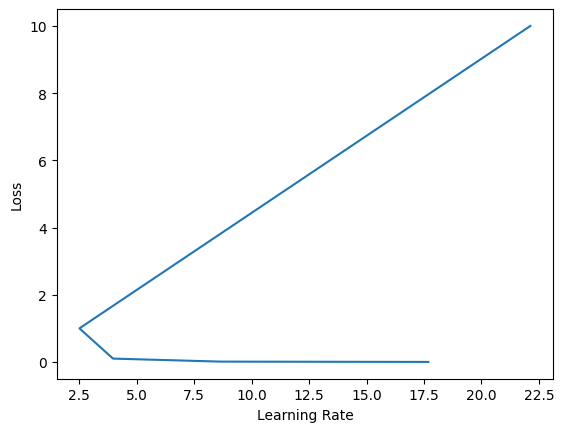

In [107]:
import matplotlib.pyplot as plt
plt.plot(loss_list, lr_list)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()

In [38]:
def validate(X, y):
  emb = C[X]
  h = torch.tanh(emb.view(-1, 9) @ w1 + b1)
  logits = h @ w2 + b2
  loss = F.cross_entropy(logits, y)
  return loss.item()

In [39]:
validate(Xval, yval)

2.3323659896850586

In [40]:
validate(Xtest, ytest)

2.321162223815918

In [44]:
def generate_name(block_size, number):
  output = []
  # g = torch.Generator().manual_seed(42)
  for _ in range(number):
    idx = 29
    context = [29] * block_size
    name = ''
    while True:
      emb = C[torch.tensor([context])]
      h = torch.tanh(emb.view(-1, 9) @ w1 + b1)
      logits = h @ w2 + b2
      probs = F.softmax(logits, dim = 1)
      idx = torch.multinomial(probs, num_samples = 1, replacement = True, generator = g).item()
      context = context[1:] + [idx]
      if idx == 29:
        break
      name += (idx2c[idx])
    output.append(name)
  return output

In [47]:
generate_name(3, 20)

['kava',
 'gohenoanashantaranyuya',
 'naajana',
 'sanya',
 'anana',
 'vao',
 'raransha',
 'kaartha',
 'gohamrushaeshwaranqhanthanaorimatawishana',
 'karamana',
 'karamathasanu',
 'ranonana',
 'vut',
 'raamilakna',
 'dudenalawa',
 'naraananeshan',
 'arshadakamraaraananajannikeanasavargo soyalatrakayaana',
 'yashilanayaarantavachaolan',
 'lakesharushanyursantrana',
 'ceeraayakeka']